### Importing Modules (p444)

In [1]:
from scipy import stats, optimize
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')

### Review of Statistics and Probability (p444)

In [2]:
# compute the mean/median of a dataset
x = np.array([3.5, 1.1, 3.2, 2.8, 6.7, 4.4, 0.9, 2.2])
np.mean(x), np.median(x)

(3.1, 3.0)

In [3]:
# compute the min/max
x.min(), x.max()

(0.9, 6.7)

In [4]:
# compute the population variance/standard deviation
x.var(), x.std()

(3.0700000000000007, 1.7521415467935233)

In [5]:
# compute variance/standard deviation from a sample
x.var(ddof=1), x.std(ddof=1)

(3.5085714285714293, 1.8731181032095732)

### Random Numbers (p446)

In [6]:
# produce a single random number
np.random.rand(), np.random.randn()

(0.6668737637430732, 0.05943341785195446)

In [7]:
# generate a vector of length 5 and (2,4) array
np.random.rand(5), np.random.rand(2, 4)

(array([0.27248955, 0.72449073, 0.51994401, 0.71322607, 0.1973632 ]),
 array([[0.30439102, 0.26705597, 0.9251354 , 0.78327514],
        [0.2528147 , 0.5983029 , 0.29817293, 0.87544963]]))

In [8]:
# generate random integers
np.random.randint(low=10, high=20, size=(2, 10))

array([[15, 15, 18, 10, 18, 17, 15, 12, 16, 16],
       [16, 10, 13, 11, 13, 13, 10, 13, 10, 11]])

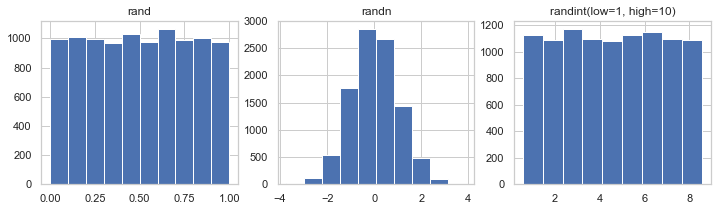

In [9]:
# demonstrate random numbers generated above are distributed differently
# rand/randint appears uniform with different ranges/types
# while randn resembels a Gaussian curve centered at a
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
axes[0].hist(np.random.rand(10000))
axes[0].set_title("rand")
axes[1].hist(np.random.randn(10000))
axes[1].set_title("randn")
axes[2].hist(np.random.randint(low=1, high=10, size=10000), bins=9, align='left')
axes[2].set_title("randint(low=1, high=10)");

In [10]:
# sample unique items from the set of integers without replacement
np.random.choice(10, 5, replace=False)

array([6, 3, 5, 0, 4])

In [11]:
# seed the random number generator
np.random.seed(123456789)
np.random.rand()

0.532833024789759

In [12]:
# returns the same value
np.random.seed(123456789);
np.random.rand()

0.532833024789759

In [13]:
# generate standard normal distributed random numbers with RandomState
prng = np.random.RandomState(123456789)
prng.randn(2, 4)

array([[ 2.212902  ,  2.1283978 ,  1.8417114 ,  0.08238248],
       [ 0.85896368, -0.82601643,  1.15727052,  1.37591514]])

In [14]:
# chisqaure
prng.chisquare(1, size=(2, 2))

array([[1.26859720e+00, 2.02731988e+00],
       [2.52605129e-05, 3.00376585e-04]])

In [15]:
# student-T distribution
prng.standard_t(1, size=(2, 3))

array([[ 0.59734384, -1.27669959,  0.09724793],
       [ 0.22451466,  0.39697518, -0.19469463]])

In [16]:
# f distribution
prng.f(5, 2, size=(2, 4))

array([[ 0.77372119,  0.1213796 ,  1.64779052,  1.21399831],
       [ 0.45471421, 17.64891848,  1.48620557,  2.55433261]])

In [17]:
# binomial distribution
prng.binomial(10, 0.5, size=10)

array([8, 3, 4, 2, 4, 5, 4, 4, 7, 5])

In [18]:
# poisson distribution
prng.poisson(5, size=10)

array([7, 1, 3, 4, 6, 4, 9, 7, 3, 6])

### Random Variables and Distributions (p451)

In [19]:
# random variable classes in SciPy stats can be used 
# to compute descriptive statistics and 
# to generate random numbers following the distribution using 'rvs'

In [20]:
# create a normal distributed random variable
X = stats.norm(1, 0.5)

In [21]:
# compute descriptive statistics of random vaiable 'X'
X.mean(), X.median(), X.std(), X.var()

(1.0, 1.0, 0.5, 0.25)

In [22]:
[X.moment(n) for n in range(5)]

[1.0, 1.0, 1.25, 1.75, 2.6875]

In [23]:
# obtain a distribution-dependent list of statistics
# : the mean and the variance
X.stats()

(array(1.), array(0.25))

In [24]:
# evaluate the probability distribution function (PDF)
X.pdf([0, 1, 2])

array([0.10798193, 0.79788456, 0.10798193])

In [25]:
# evaluate the cumulative distribution function
X.cdf([0, 1, 2])

array([0.02275013, 0.5       , 0.97724987])

In [26]:
# compute confidence intervals: 0.95, 0.99
X.interval(0.95), X.interval(0.99)

((0.020018007729972975, 1.979981992270027),
 (-0.2879146517744502, 2.28791465177445))

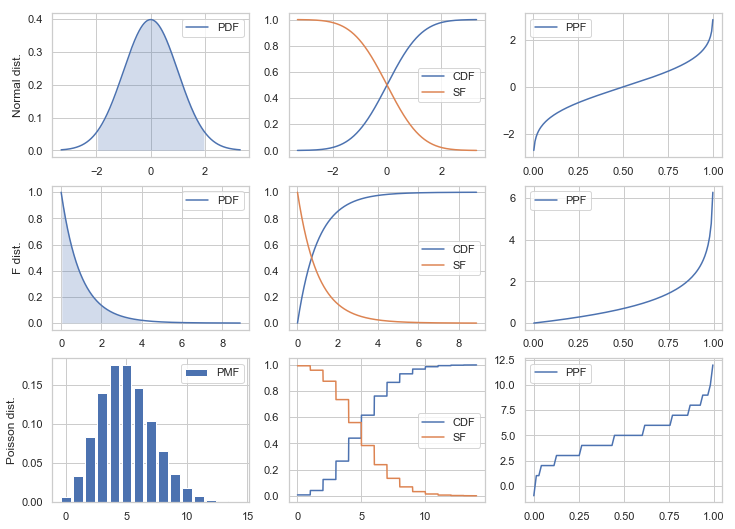

In [27]:
# plot probability distribution with the corresponding cumulative
# probability function and the percentpoint function
def plot_rv_distribution(X, axes=None):
    """Plot the PDF or PMF, CDF, SF and PPF of a given random
    variable"""
    if axes is None:
        fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    x_min_999, x_max_999 = X.interval(0.999)
    x999 = np.linspace(x_min_999, x_max_999, 1000)
    x_min_95, x_max_95 = X.interval(0.95)
    x95 = np.linspace(x_min_95, x_max_95, 1000)
    if hasattr(X.dist, "pdf"):
        axes[0].plot(x999, X.pdf(x999), label="PDF")
        axes[0].fill_between(x95, X.pdf(x95), alpha=0.25)
    else:
        # discrete random variables do not have a pdf method,
        # instead we use pmf:
        x999_int = np.unique(x999.astype(int))
        axes[0].bar(x999_int, X.pmf(x999_int), label="PMF")
    axes[1].plot(x999, X.cdf(x999), label="CDF")
    axes[1].plot(x999, X.sf(x999), label="SF")
    axes[2].plot(x999, X.ppf(x999), label="PPF")
    for ax in axes:
        ax.legend()

# graph the normal distribution, the F distribution and the discrete
# Poisson distribution
fig, axes = plt.subplots(3, 3, figsize=(12, 9))
X = stats.norm()
plot_rv_distribution(X, axes=axes[0, :])
axes[0, 0].set_ylabel("Normal dist.")
X = stats.f(2, 50)
plot_rv_distribution(X, axes=axes[1, :])
axes[1, 0].set_ylabel("F dist.")
X = stats.poisson(5)
plot_rv_distribution(X, axes=axes[2, :])
axes[2, 0].set_ylabel("Poisson dist.");

In [28]:
# use class method to use the random variable classes in SciPy's stats
stats.norm.stats(loc=2, scale=0.5)

(array(2.), array(0.25))

In [29]:
# above give the same result as creating an instance first
# and calling the corresponding method
stats.norm(loc=2, scale=0.5).stats()

(array(2.), array(0.25))

In [30]:
# draw random numbers distributed according to the given probability distribution
X = stats.norm(1, 0.5)
X.rvs(10)

array([1.43841711, 2.56662976, 0.50437638, 1.43558405, 1.24249875,
       1.15962805, 1.2265658 , 0.54154384, 1.66932021, 1.42933398])

/Users/geeyeol/.pyenv/versions/3.7.1/envs/python3-staging/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


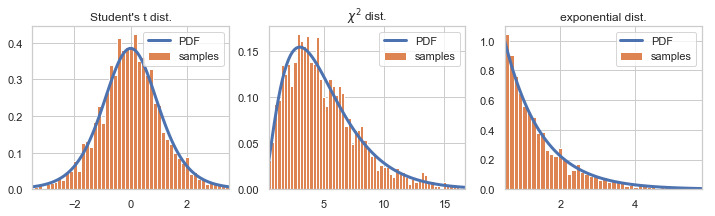

In [31]:
# graph a histogram of a large number of samples of a random variable
# to see that the resulting random numbers above are distributed 
# according to the corresponding probability distribution function, 
# random variable and compare it to the probability distribution function

def plot_dist_samples(X, X_samples, title=None, ax=None):
    """ Plot the PDF and histogram of samples of a continuous
     random variable"""
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 4))

    x_lim = X.interval(.99)
    x = np.linspace(*x_lim, num=100)

    ax.plot(x, X.pdf(x), label="PDF", lw=3)
    ax.hist(X_samples, label="samples", normed=1, bins=75)
    # distributes the elements in the tuple x_lim to different arguments 
    # for the function
    ax.set_xlim(*x_lim)
    ax.legend()

    if title:
        ax.set_title(title)
    return ax

fig, axes = plt.subplots(1, 3, figsize=(12, 3))
N = 2000
# Student's t distribution
X = stats.t(7.0)
plot_dist_samples(X, X.rvs(N), "Student's t dist.", ax=axes[0])
# The chisquared distribution
X = stats.chi2(5.0)
plot_dist_samples(X, X.rvs(N), r"$\chi^2$ dist.", ax=axes[1])
# The exponential distribution
X = stats.expon(0.5)
plot_dist_samples(X, X.rvs(N), "exponential dist.", ax=axes[2]);

In [32]:
# refit the random variables to the chisquare distribution
# after drawing 500 random samples from the chisquare distribution
# with five degrees of freedom
X = stats.chi2(df=5)
X_samples = X.rvs(500)
df, loc, scale = stats.chi2.fit(X_samples)
df, loc, scale
(5.2886783664198465, 0.0077028130326141243, 0.93310362175739658)
Y = stats.chi2(df=df, loc=loc, scale=scale)

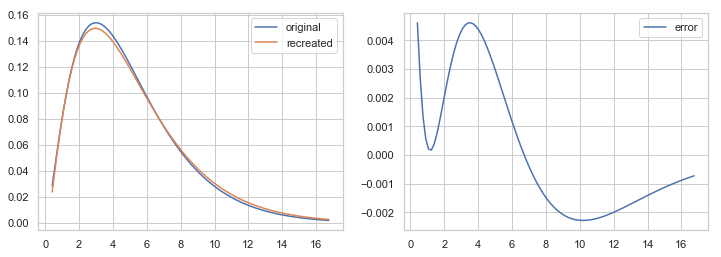

In [33]:
# verify whether the probability distribution of Y resembles
# the probability distribution of the original random variable X
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
x_lim = X.interval(.99)
x = np.linspace(*x_lim, num=100)

axes[0].plot(x, X.pdf(x), label="original")
axes[0].plot(x, Y.pdf(x), label="recreated")
axes[0].legend()

axes[1].plot(x, X.pdf(x) - Y.pdf(x), label="error")
axes[1].legend();